In [37]:
import gym
from collections import defaultdict
import numpy as np

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

Let's get the state value function for a random policy where each action has the 25% chance of choice <br>
First visit montecarlo

In [6]:
# create a vector containing all the state values initialized from zero
state_value_function=[]
for _ in range(15) :
    state_value_function.append([0])
    
returns=[]
for _ in range(15) :
    returns.append([])

states=[]
rewards=[]
observation, info = env.reset()
states.append(observation) #this is S0
rewards.append(0) #this is R0 that is not counted
gamma=0.8

In [7]:
def Average(lst): 
    return sum(lst) / len(lst)

In [11]:
for j in range(10000):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    
    rewards.append(reward)
    states.append(observation) #the last does not need to be counted
    
    if terminated or truncated:
        
        G = 0
        T = len(states)-1
        
        for i in range(T):  #this generates a list from 0 to T-1
            t = T-1-i
            G=gamma*G+rewards[t+1]
            if not (states[t] in states[:t]):
                    returns[states[t]].append(G)
                    V[states[t]]=Average(returns[states[t]])
                    
        #if ((j+1)%100)==0:
            #print(V)
            #print("------------------------------------------------------")
        
        states.clear()
        rewards.clear()
        observation, info = env.reset()
        states.append(observation) #this is S0
        rewards.append(0) #this is R0 that is not counted

print(V)

defaultdict(<class 'float'>, {8: 0.009043465993359076, 1: 0.0013430609645843257, 4: 0.0022827576609478857, 0: 0.0013906939513458837, 6: 0.016949111385637986, 2: 0.00441700192735102, 3: 0.0011697682010050256, 10: 0.06310131117419358, 9: 0.028632066610911278, 13: 0.0946742252023018, 14: 0.30499366464})


In [49]:
def MC_first_visit_prediction(policy, env, num_episodes, gamma=1.0):
    
    V=[]
    for _ in range(env.observation_space.n) :
        V.append(0)

    returns=[]
    for _ in range(env.observation_space.n) :
        returns.append([])

    states=[]
    rewards=[]
    observation, info = env.reset()
    states.append(observation) #this is S0
    rewards.append(0) #this is R0 that is not counted

    for episode in range(num_episodes):
        while True:
            observation, reward, terminated, truncated, info = env.step(env.action_space.sample())

            rewards.append(reward)
            states.append(observation) #the last does not need to be counted

            if terminated or truncated:
                break
                
        G = 0
        T = len(states)-1
        for i in range(T):  #this generates a list from 0 to T-1
            t = T-1-i
            G=gamma*G+rewards[t+1]
            if not (states[t] in states[:t]):
                    returns[states[t]].append(G)
                    V[states[t]]=Average(returns[states[t]])

        states.clear()
        rewards.clear()
        observation, info = env.reset()
        states.append(observation) #this is S0
        rewards.append(0) #this is R0 that is not counted
    return V

In [50]:
def policy(): #random policy
    return env.action_space.sample()

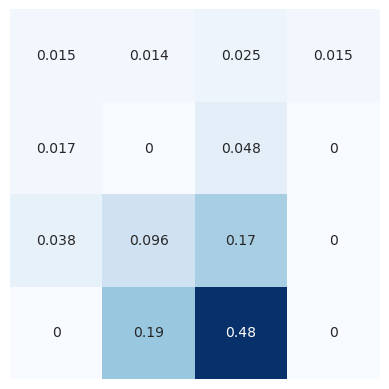

In [62]:
V=MC_first_visit_prediction(policy, env, 10000, 1)
V=np.asarray(V, dtype=np.float32)
V=V.reshape((4,4))
import seaborn as sns
import matplotlib.pyplot as plt  
ax = sns.heatmap(V,
                 annot=True, square=True,
                 cbar=False, cmap='Blues',
                 xticklabels=False, yticklabels=False)
plt.show()

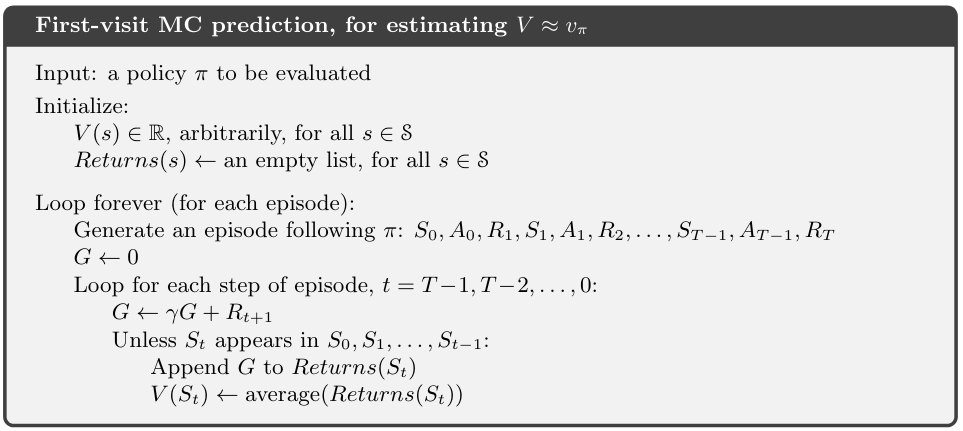